

_Máster Universitario en Inteligencia Artificial_

# Actividad grupal: Explorando patrones ocultos: Detección de Anomalías en datos
## Objetivos

Mediante este trabajo se pretende que ponga en práctica la aplicación de las técnicas de detección de anomalías. El objetivo es analizar si existen anomalías en el conjunto de datos aplicando técnicas univariantes y multivariantes. Debe detallar los pasos que hay que realizar para detección de valores inusuales.

- 	Entender los métodos media móvil, z-score, Isolation Forest y Local Outlier Factor
-	Implementar el código para cada una de estas técnicas y analizar si existen o no anomalía
-   Investigar sobre una técnica de detección de anomalías con un caso de uso concreto.

Descripción de la actividad

Debes realizar la actividad en el Notebook adjunto. Debes ir completando el código solicitado, así como responder a las preguntas que se van realizando.

Tareas que debe realizar
- Detección de anomalías.
- Debes completar el código pedido en este notebook y contestar las preguntas finales.
- Buscar dos artículos científicos (https://scholar.google.es/) con un caso de uso de detección de anomalías. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep- Learning.Para cada artículo debe indicar:
    * Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la detección anomalías.
    * Técnicas de detección de anomas empleadas.
    * Principales resultados de la aplicación y de la investigación.


#### Integrantes del grupo

In [25]:
# Coloca en este espacio el nombre de los integrantes del grupo
# Carlos Mateo Jurado Díaz
# Laura Ximena Ahumada Urquijo
# Mariano Octavio Cortes Zuluaga
# David
# Luis Alberto López González

## Detección de anomalías

Los transformadores juegan un papel muy importante en el sistema eléctrico. Aunque son algunos de los componentes más confiables de la red eléctrica, también son propensos a fallar debido a muchos factores, tanto internos como externos. Podría haber muchos iniciadores que causen una falla en el transformador, pero los que potencialmente pueden conducir a una falla catastrófica son los siguientes:
Falla mecánica
Falla dieléctrica

Contenido
Estos datos se recopilaron a través de dispositivos IoT desde el 25 de junio de 2019 hasta el 14 de abril de 2020 y se actualizaron cada 15 minutos.
El dataset contiene 19352 registros.
Descripción de los parámetros:
Voltaje de corriente:
1. VL1- Fase Línea 1
2. VL2- Fase Línea 2
3. VL3- Fase Línea 3
4. IL1- Línea actual 1
5. IL2- Línea actual 2
6. IL3- Línea actual 3
7. VL12- Línea de tensión 1 2
8. VL23- Línea de tensión 2 3
9. VL31- Línea de tensión 3 1
10. INUT-Corriente neutra

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns



In [2]:
# se carga el dataset, con separados ;, se transforman las dos columnas Date y Time a una única columna con tipo datetime
# en el fichero CSV existen NaN identificados por ?
df = pd.read_csv('../data/raw/CurrentVoltage.csv', sep=',') 

# Verificar la carga de datos
print(df.head())


    DeviceTimeStamp    VL1    VL2    VL3  IL1  IL2  IL3  VL12  VL23  VL31  \
0  2019-06-25T13:06    0.0    0.0    0.0  0.0  0.0  0.0   0.0   0.0   0.0   
1  2019-06-27T10:49  238.7  238.7  238.8  0.0  0.0  0.0   0.0   0.0   0.0   
2  2019-06-27T10:51  238.4  238.5  238.5  0.0  0.0  0.0   0.0   0.0   0.0   
3  2019-06-27T10:52  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   
4  2019-06-27T10:52  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   

   INUT  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  


In [3]:
df.describe()

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
count,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.00000,19352.000000,19352.000000,19352.000000
mean,241.068019,240.515456,239.912293,73.710857,58.970592,83.226555,379.47530,378.526261,379.969311,26.315187
std,9.536380,9.801129,8.846213,41.256800,40.463867,43.609360,119.96308,119.417113,120.074752,15.103268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,235.400000,235.100000,235.100000,46.775000,31.500000,56.300000,400.70000,401.300000,401.900000,16.800000
50%,242.700000,242.100000,241.100000,69.500000,50.200000,80.200000,417.80000,416.300000,417.900000,25.600000
75%,247.500000,246.700000,245.300000,100.100000,82.500000,113.900000,427.50000,425.300000,427.600000,35.700000
max,261.200000,261.300000,261.300000,224.100000,253.600000,247.300000,446.50000,444.800000,447.300000,145.800000


Se observa que para las variables VL1, ..., IL3 , manejan escalas parecidas mientras que las VL12, ..., VL31 a su vez tambien manejan escalas similares sin alejase mucho del primer grupo de variables.


#### ¿Cuántas instancias tiene el dataset?

In [4]:
df.shape

(19352, 11)

El dataset tiene 19352 instancia

#### ¿Cuál es el tipo de datos predominante en las variables?

In [5]:
df.dtypes

DeviceTimeStamp     object
VL1                float64
VL2                float64
VL3                float64
IL1                float64
IL2                float64
IL3                float64
VL12               float64
VL23               float64
VL31               float64
INUT               float64
dtype: object

el tipo de dato predominante es float64

## Variables nulas

In [6]:
df.isnull().sum()

DeviceTimeStamp    0
VL1                0
VL2                0
VL3                0
IL1                0
IL2                0
IL3                0
VL12               0
VL23               0
VL31               0
INUT               0
dtype: int64

El dataset no tiene variables nulas

#### ¿Tiene este dataset datos faltantes?

¿Tiene este dataset datos faltantes?

No, ya que no hay valores nulos y aunque hay varios datos en 0, con la informacion que tenermos del dataset no podemos asegurar que sea un dato faltante o que el transformador esta fallando y por eso se registra un 0

#### ¿Es necesario hacer algún tratamiendo adicional sobre los datos?

Por supuesto, aunque no es recomendable estandarizar dado que las variables en general son escalas similares se debe validar duplicados y tener los formatos adecuados entre varios temas. 

In [7]:
# Convertir DeviceTimeStamp a datetime
df["DeviceTimeStamp"] = pd.to_datetime(df["DeviceTimeStamp"])

# Confirmar tipos de datos
print(df.dtypes)


DeviceTimeStamp    datetime64[ns]
VL1                       float64
VL2                       float64
VL3                       float64
IL1                       float64
IL2                       float64
IL3                       float64
VL12                      float64
VL23                      float64
VL31                      float64
INUT                      float64
dtype: object


In [8]:
# Verificar y eliminar duplicados
print(f"Duplicados antes: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicados después: {df.duplicated().sum()}")



Duplicados antes: 32
Duplicados después: 0


Se eliminaron datos duplicados


Columnas numéricas: ['VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12', 'VL23', 'VL31', 'INUT']


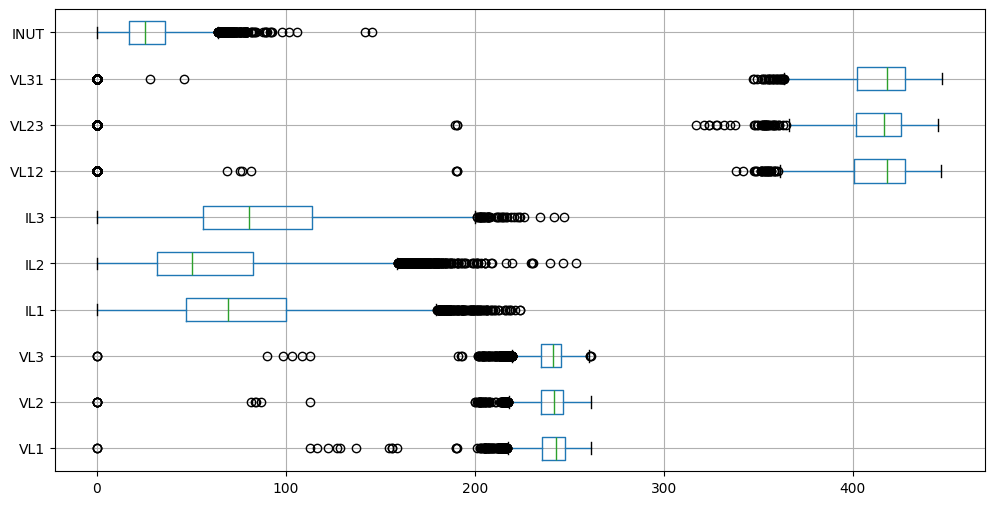

In [9]:
# Visualización de variables mediante boxplots
# Crear boxplot manualmente con Matplotlib
# Seleccionar columnas numéricas automáticamente
numeric_columns = ['VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12', 'VL23', 'VL31', 'INUT']
print("Columnas numéricas:", numeric_columns)


plt.figure(figsize=(12, 6))
df[numeric_columns].boxplot(vert=False)
plt.show()



## Interpretación por Variable

### a) INUT (corriente neutra)
- La mayoría de los valores están **agrupados cerca de la mediana**, con pocos outliers en el extremo superior.
- Los valores outliers indican eventos donde la corriente neutra **superó los valores típicos**, lo que puede ser indicativo de **fallos en el sistema eléctrico** o **condiciones extremas**.

### b) VL31, VL23, VL12 (voltajes entre líneas)
- Presentan **distribuciones más amplias**, con valores más dispersos.
- Hay una cantidad significativa de **outliers en el extremo superior**, lo que sugiere **fluctuaciones de voltaje inusuales**.
- Los voltajes entre líneas parecen ser **más propensos a variaciones extremas** en comparación con las otras variables.

### c) IL3, IL2, IL1 (corrientes de línea)
- Tienen **distribuciones más centradas** y cajas más pequeñas, lo que indica **menor variabilidad** en comparación con los voltajes.
- Sin embargo, hay muchos **outliers en los extremos superiores**, especialmente en **IL1** e **IL2**, lo que podría reflejar **sobrecargas en las líneas**.

### d) VL1, VL2, VL3 (voltajes de fases)
- Las distribuciones son **más compactas**, con medianas bien definidas y pocos valores atípicos.
- Esto sugiere que los voltajes de las fases son **más estables**, aunque hay algunos **outliers inferiores y superiores** que podrían indicar **eventos de bajo o alto voltaje**.

---

## Observaciones Generales

### Estabilidad relativa
- Las variables de **voltajes de fases** (VL1, VL2, VL3) son **más estables**, con menor variabilidad y menos valores atípicos.
- Las **corrientes de línea** (IL1, IL2, IL3) tienen **más dispersión** y **outliers en el extremo superior**.

### Alta frecuencia de outliers
- Los **voltajes entre líneas** (VL31, VL23, VL12) muestran una cantidad considerable de **outliers**, lo que podría reflejar **problemas recurrentes en el sistema**.

### Medianas bien definidas
- Las medianas de todas las variables son **consistentes** con distribuciones relativamente simétricas, excepto por los **voltajes entre líneas**, que presentan mayor **asimetría**.



## Media móvil

Vamos a aplicar la técnica de detección de anomalías de Media Móvil sobre la variable INUT

In [10]:
# Calcula la media móvil para 100 valores
df['INUT_rolling_mean'] = df['INUT'].rolling(window=100).mean()

In [12]:
# Crear un DataFrame para anomalías
anomalies_df = pd.DataFrame(columns=['Position', 'Anomalous_Value'])

# Calcular umbrales superior e inferior
upper_threshold = df['INUT_rolling_mean'] * 1.99
lower_threshold = df['INUT_rolling_mean'] * 0.01

# Asegurar que los índices están alineados
upper_threshold = upper_threshold.reset_index(drop=True)
lower_threshold = lower_threshold.reset_index(drop=True)
df = df.reset_index(drop=True)

# Detectar anomalías y agregarlas al DataFrame de anomalías
for i in range(len(df)):
    if df['INUT'].iloc[i] > upper_threshold.iloc[i] or df['INUT'].iloc[i] < lower_threshold.iloc[i]:
        anomalies_df = pd.concat([
            anomalies_df,
            pd.DataFrame({'Position': [i], 'Anomalous_Value': [df['INUT'].iloc[i]]})
        ], ignore_index=True)

# Mostrar los valores anómalos
print(anomalies_df)


# Crear un DataFrame para anomalías
anomalies_df = pd.DataFrame(columns=['Position', 'Anomalous_Value'])

# Calcular umbrales superior e inferior
upper_threshold = df['INUT_rolling_mean'] * 1.99
lower_threshold = df['INUT_rolling_mean'] * 0.01

# Asegurar que los índices están alineados
upper_threshold = upper_threshold.reset_index(drop=True)
lower_threshold = lower_threshold.reset_index(drop=True)
df = df.reset_index(drop=True)

# Detectar anomalías y agregarlas al DataFrame de anomalías
for i in range(len(df)):
    if df['INUT'].iloc[i] > upper_threshold.iloc[i] or df['INUT'].iloc[i] < lower_threshold.iloc[i]:
        anomalies_df = pd.concat([
            anomalies_df,
            pd.DataFrame({'Position': [i], 'Anomalous_Value': [df['INUT'].iloc[i]]})
        ], ignore_index=True)

# Mostrar los valores anómalos
print(anomalies_df)


/tmp/ipykernel_3265/3634192678.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anomalies_df = pd.concat([


    Position  Anomalous_Value
0       1299              0.4
1       1300              0.4
2       1301              0.4
3       1302              0.0
4       1303              0.0
..       ...              ...
678    17071             75.8
679    17169             78.4
680    17914             52.2
681    18370             68.2
682    18921             74.9

[683 rows x 2 columns]


/tmp/ipykernel_3265/3634192678.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anomalies_df = pd.concat([


    Position  Anomalous_Value
0       1299              0.4
1       1300              0.4
2       1301              0.4
3       1302              0.0
4       1303              0.0
..       ...              ...
678    17071             75.8
679    17169             78.4
680    17914             52.2
681    18370             68.2
682    18921             74.9

[683 rows x 2 columns]


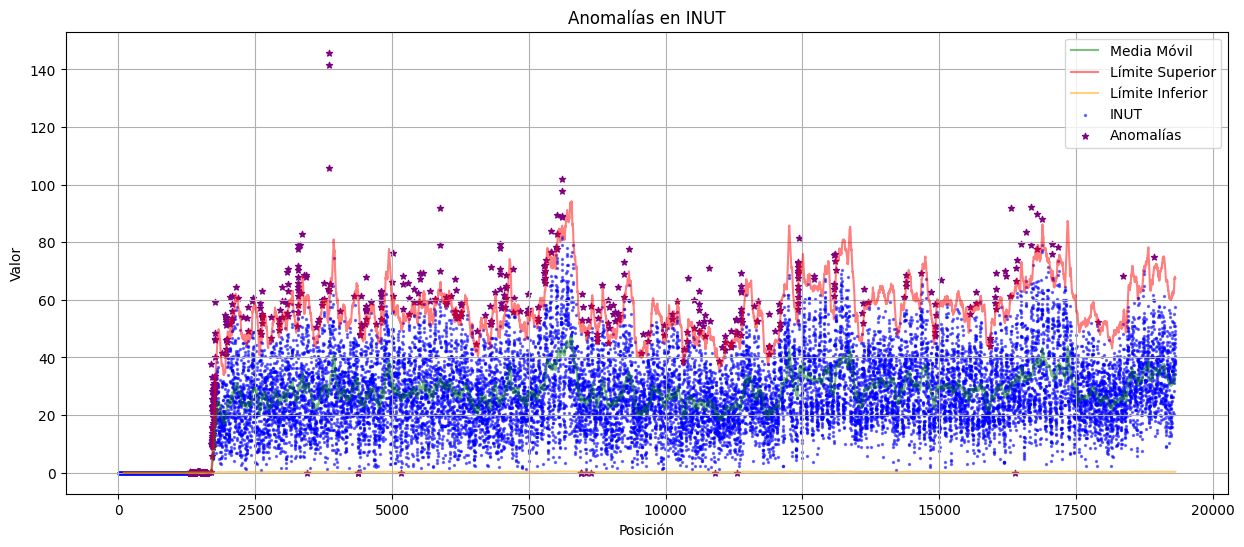

In [13]:
# Visualiza los resultados

plt.figure(figsize=(15, 6))
plt.plot(df['INUT_rolling_mean'], label='Media Móvil', color='green', alpha=0.5)
plt.plot(upper_threshold, label='Límite Superior', color='red', linestyle='-', alpha=0.5)
plt.plot(lower_threshold, label='Límite Inferior', color='orange', linestyle='-', alpha=0.5)
plt.scatter(range(len(df['INUT'])), df['INUT'], color='blue', s=2, label='INUT', alpha=0.5)
plt.scatter(anomalies_df['Position'], anomalies_df['Anomalous_Value'], color='purple', marker='*', s=20, label='Anomalías')

plt.xlabel('Posición')
plt.ylabel('Valor')
plt.title('Anomalías en INUT')
plt.legend()
plt.grid(True)
plt.show()

#### Z-Score

In [14]:
# Vamos a aplicar la técnica de detección de anomalías Z-Score
# Pon aquí tu código
df['INUT_zscore'] = (df['INUT'] - df['INUT'].mean()) / df['INUT'].std()

In [15]:
# Define un umbral para detectar anomalías (por ejemplo, 3 desviaciones estándar)
# Se usa 3 veces la desviacion estandar debido a que en ese rango se encuentra el 99.7% de lo datos
threshold = 3

# Se crea un dataframe con las anomalias
anomaliesz_df = pd.DataFrame(columns=['Position', 'Anomalous_Value'])

# Se calcula y se agregan al dataframe los valores que se salen de ese rango
for i in range(len(df)):
  if df['INUT_zscore'][i] > threshold or df['INUT_zscore'][i] < -threshold:
    anomaliesz_df = pd.concat([anomaliesz_df, pd.DataFrame({'Position': [i], 'Anomalous_Value': [df['INUT'][i]]})], ignore_index=True)

# Se muestran esos valores
anomaliesz_df

/tmp/ipykernel_3265/4044712369.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anomaliesz_df = pd.concat([anomaliesz_df, pd.DataFrame({'Position': [i], 'Anomalous_Value': [df['INUT'][i]]})], ignore_index=True)


,Position,Anomalous_Value
0,3277,77.6
1,3283,79.0
2,3286,71.8
3,3327,78.9
4,3361,83.0
...,...,...
67,17064,79.5
68,17071,75.8
69,17168,73.4
70,17169,78.4


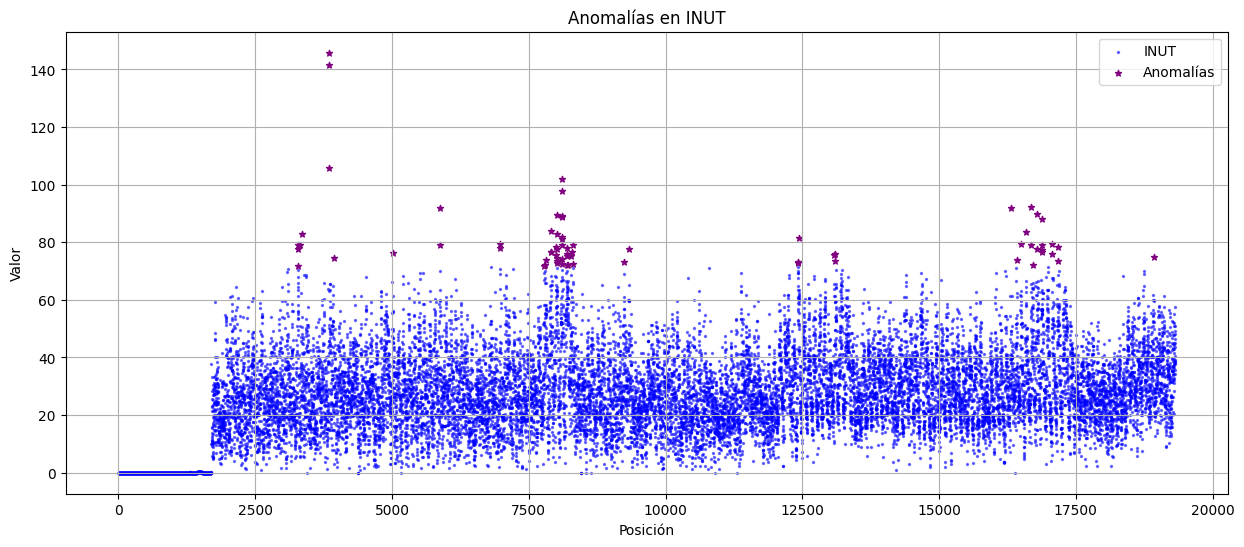

In [16]:
# Visualiza los resultados

plt.figure(figsize=(15, 6))
plt.scatter(range(len(df['INUT'])), df['INUT'], color='blue', s=2, label='INUT', alpha=0.5)
plt.scatter(anomaliesz_df['Position'], anomaliesz_df['Anomalous_Value'], color='purple', marker='*', s=20, label='Anomalías')

plt.xlabel('Posición')
plt.ylabel('Valor')
plt.title('Anomalías en INUT')
plt.legend()
plt.grid(True)
plt.show()

#### Isolation Forest

In [17]:
# Vamos a aplicar la técnica de detección de anomalías de Isolation Forest, configura el parámetro contamination en 5%
# Pon aquí tu código
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Agrega las columnas de puntaje y si es dato anómalo o no en el dataframe
cols = ['writing score', 'reading score', 'math score']

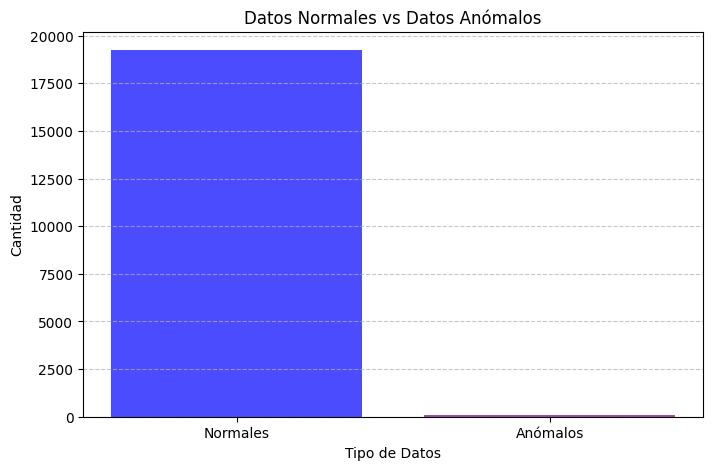

In [19]:
# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales
# Contar datos normales y anómalos
num_anomalies = len(anomaliesz_df)  # Número de datos anómalos
num_normal = len(df) - num_anomalies  # Número de datos normales

# Crear un DataFrame para el gráfico
data_counts = pd.DataFrame({
    'Tipo': ['Normales', 'Anómalos'],
    'Cantidad': [num_normal, num_anomalies]
})

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(data_counts['Tipo'], data_counts['Cantidad'], color=['blue', 'purple'], alpha=0.7)
plt.title('Datos Normales vs Datos Anómalos')
plt.ylabel('Cantidad')
plt.xlabel('Tipo de Datos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


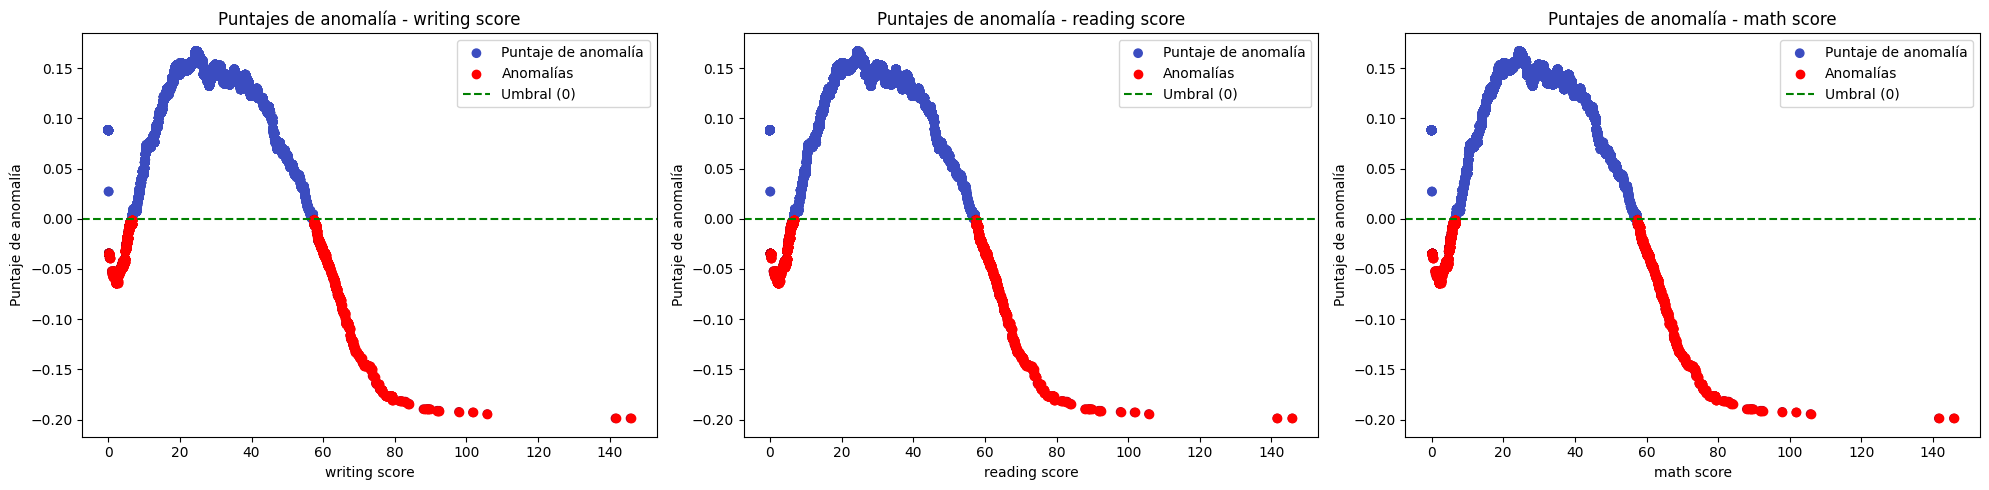

In [20]:
# Crea un gráfico donde se puedan ver los datos anómalos sobre la variable INUT.
# Crear figura para visualizar
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    # Entrenando Isolation Forest en la columna
    isolation_forest = IsolationForest(contamination=0.05, random_state=42)
    isolation_forest.fit(df['INUT'].values.reshape(-1, 1))

    # Obteniendo puntajes de anomalía y predicciones
    anomaly_score = isolation_forest.decision_function(df['INUT'].values.reshape(-1, 1))
    outliers = isolation_forest.predict(df['INUT'].values.reshape(-1, 1))

    # Visualizar puntajes de anomalía
    axs[i].scatter(df['INUT'], anomaly_score, c=(outliers == -1), cmap='coolwarm', label='Puntaje de anomalía')

    # Marcar anomalías
    axs[i].scatter(
        df['INUT'][outliers == -1],
        anomaly_score[outliers == -1],
        color='red',
        label='Anomalías'
    )

    # Configuración del gráfico
    axs[i].set_title(f'Puntajes de anomalía - {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Puntaje de anomalía')
    axs[i].axhline(y=0, color='g', linestyle='--', label='Umbral (0)')
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show()

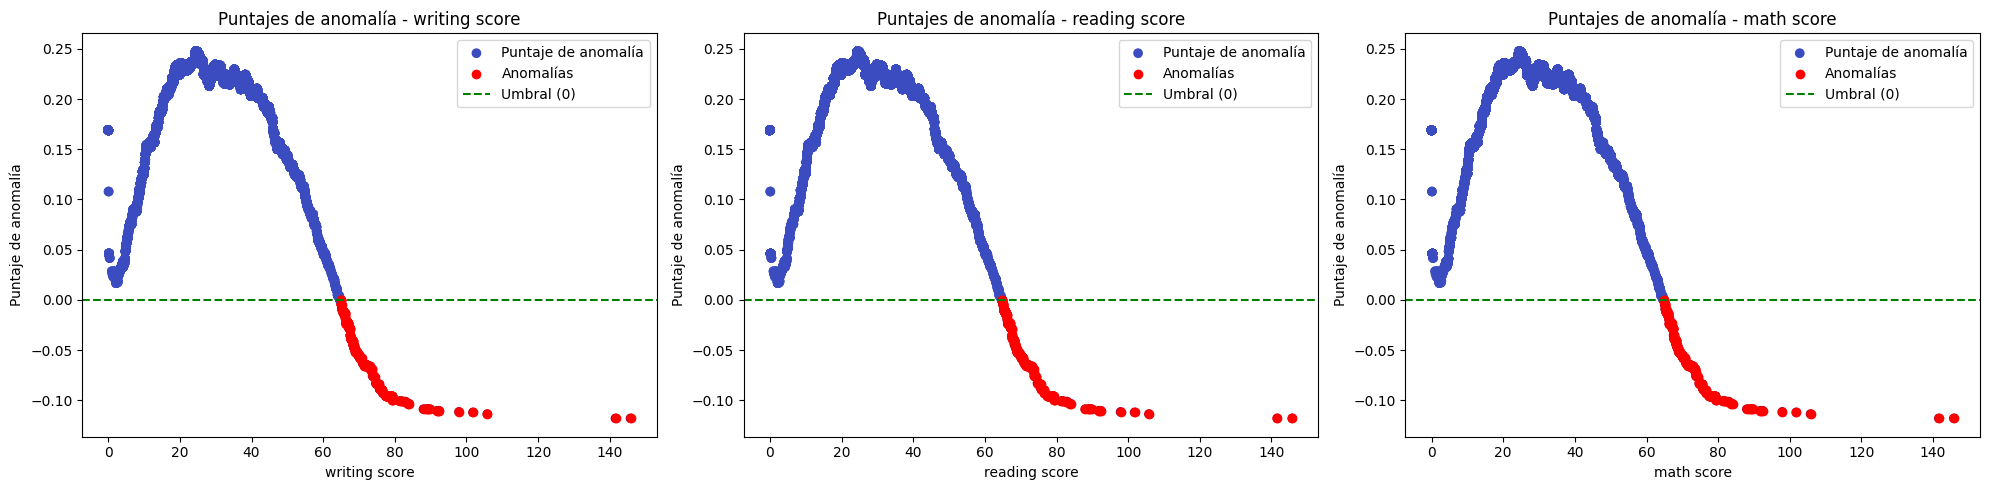

In [21]:
# Repite los pasos anteriores con el parámetro de contamination en 1%
# Crear figura para visualizar
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    # Entrenando Isolation Forest en la columna
    isolation_forest = IsolationForest(contamination=0.01, random_state=42)
    isolation_forest.fit(df['INUT'].values.reshape(-1, 1))

    # Obteniendo puntajes de anomalía y predicciones
    anomaly_score = isolation_forest.decision_function(df['INUT'].values.reshape(-1, 1))
    outliers = isolation_forest.predict(df['INUT'].values.reshape(-1, 1))

    # Visualizar puntajes de anomalía
    axs[i].scatter(df['INUT'], anomaly_score, c=(outliers == -1), cmap='coolwarm', label='Puntaje de anomalía')

    # Marcar anomalías
    axs[i].scatter(
        df['INUT'][outliers == -1],
        anomaly_score[outliers == -1],
        color='red',
        label='Anomalías'
    )

    # Configuración del gráfico
    axs[i].set_title(f'Puntajes de anomalía - {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Puntaje de anomalía')
    axs[i].axhline(y=0, color='g', linestyle='--', label='Umbral (0)')
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show()

## Local Outlier Factor

In [22]:
# Vamos a aplicar la técnica de detección de anomalías de Local Outlier Factor
# Pon aquí tu código
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination='auto')
X = df[['VL31','INUT']].values
y_pred = clf.fit_predict(X)

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]


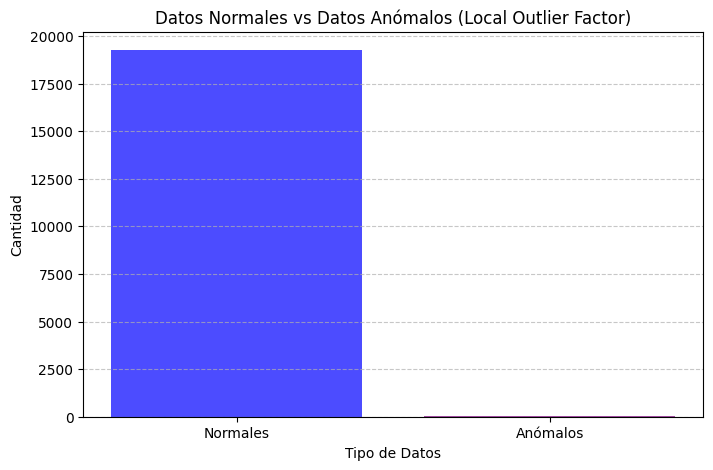

In [23]:
# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales
# Contar datos normales y anómalos
num_normal = sum(in_mask)  # Cantidad de datos normales
num_anomalous = sum(out_mask)  # Cantidad de datos anómalos

# Crear un DataFrame para el gráfico
data_counts = pd.DataFrame({
    'Tipo': ['Normales', 'Anómalos'],
    'Cantidad': [num_normal, num_anomalous]
})

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(data_counts['Tipo'], data_counts['Cantidad'], color=['blue', 'purple'], alpha=0.7)
plt.title('Datos Normales vs Datos Anómalos (Local Outlier Factor)')
plt.ylabel('Cantidad')
plt.xlabel('Tipo de Datos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

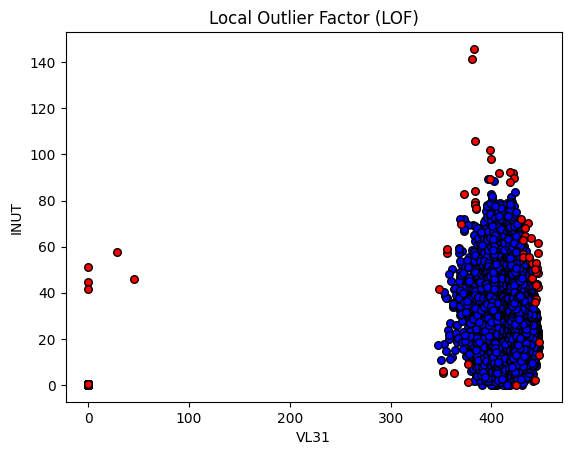

In [24]:
# Crea un gráfico donde se puedan ver los datos anómalos sobre la variable INUT.
plt.title("Local Outlier Factor (LOF)")
# puntos normales
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('VL31');
plt.ylabel('INUT');
plt.show()

## Análisis de Anomalías

### 1. Media Móvil
#### Gráfica:
- Los puntos que exceden los **límites superior** (línea roja) e **inferior** (línea amarilla) son marcados como anomalías (estrellas moradas).
- Las anomalías están concentradas principalmente en los **valores más altos** de INUT.

#### Análisis de los datos:
- Hay **picos recurrentes** en posiciones específicas (por ejemplo, entre **2,500 y 5,000**, y entre **15,000 y 17,500**).
- Estos picos podrían representar eventos esporádicos en el sistema, como **sobrecargas** o **fallos específicos**.

---

### 2. Z-Score
#### Gráfica:
- Las anomalías aparecen como puntos que exceden las **±3 desviaciones estándar** de la media.
- Los valores atípicos se agrupan en los **extremos superiores**.

#### Análisis de los datos:
- Las anomalías identificadas corresponden a valores **extremadamente altos** de INUT, como los que **superan los 60** o incluso alcanzan los **140**.
- Esto sugiere que estas anomalías son **valores atípicos significativos** y no ruido en los datos.
- Los valores bajos no parecen ser identificados como anomalías, indicando que los valores negativos de INUT están dentro del **rango esperado**.

---

### 3. Isolation Forest
#### Gráfica:
- Los puntos **rojos** marcan las anomalías detectadas; estas están distribuidas de manera más uniforme.
- Los datos normales (puntos **azules**) forman un clúster denso, mientras que las anomalías están dispersas, principalmente en **valores altos** de INUT.

#### Análisis de los datos:
- Identifica anomalías tanto en valores extremos (por ejemplo, **INUT > 100**) como en **regiones menos densas** de los datos.
- Esto muestra que Isolation Forest tiene una ventaja al detectar anomalías tanto por **magnitud** como por **densidad local**.

---

### 4. Local Outlier Factor (LOF)
#### Gráfica:
- Las anomalías (puntos **rojos**) están dispersas principalmente en **valores bajos** de VL31 (por debajo de **100**) y **valores altos** de INUT (por encima de **60**).
- Los datos normales (puntos **azules**) forman un clúster alrededor de valores altos de VL31 y valores moderados de INUT.

#### Análisis de los datos:
- LOF identifica como anomalías los **valores bajos** de VL31 combinados con **valores altos** de INUT, lo que podría representar **fallos específicos** en el sistema.
- A diferencia de las otras técnicas, LOF no se enfoca únicamente en valores extremos de INUT, sino también en la **relación entre variables**.

---

## Comparación entre Técnicas

| **Técnica**         | **Anomalías principales detectadas**                          | **Observaciones particulares**                                                                 |
|----------------------|-------------------------------------------------------------|-----------------------------------------------------------------------------------------------|
| **Media Móvil**      | Picos altos en INUT (por encima de 60) en posiciones específicas. | Detecta fluctuaciones específicas en el tiempo; podría ser útil para identificar eventos repetitivos. |
| **Z-Score**          | Valores extremadamente altos de INUT (mayores a 60, hasta 140). | Menos efectiva para valores densos o distribuciones no normales.                              |
| **Isolation Forest** | Anomalías tanto en valores extremos de INUT (>100) como en regiones menos densas. | Capta tanto outliers globales como locales; útil para un análisis multivariado.               |
| **LOF**              | Valores bajos de VL31 (<100) combinados con valores altos de INUT (>60). | Capta relaciones multivariadas, como combinaciones de bajo voltaje y alta corriente.          |

---

## Especificaciones en los Datos 

### Valores altos de INUT como indicador de problemas:
- Todas las técnicas coinciden en que los **valores altos de INUT** (mayores a 60 o 100) representan anomalías.
- Esto podría corresponder a eventos como **sobrecargas** o **fluctuaciones en la corriente**.

### Relación entre VL31 e INUT:
- LOF muestra que las combinaciones de **bajo voltaje** (VL31 < 100) y **alta corriente** (INUT > 60) son atípicas y posiblemente peligrosas.
- Este tipo de combinación podría indicar **condiciones inusuales en el sistema eléctrico**.

### Distribución en el tiempo:
- Las anomalías se agrupan en ciertas posiciones (por ejemplo, entre **2,500-5,000** y **15,000-17,500**).
- Esto podría sugerir eventos **recurrentes** o un **patrón temporal** que merece investigación adicional.



## Artículos de investigación

#### Artículo 1

In [24]:
# Coloca en este espacio el análisis del artículo 1

#### Artículo 2

In [25]:
# Coloca en este espacio el análisis del artículo 2